*STORYLINE: I WAS GIVEN A FOLDER OF 12 MONTHS WORTH OF SALES DATA. MY JOB NOW IS TO COLLECTIVELY ANALYZE THOSE SALES DATA AND ANSWER 3 QUERIES

QUERY 1: WHICH MONTH GOT THE LARGEST SALES?

QUERY 2: WHICH CITY GOT THE LARGEST SALES?

QUERY 3: WHICH TIME IN A DAY RECEIVES THE LARGEST ORDER QUANTITY?

In [326]:
import pandas as pd
import glob
import os

#### Merge 12 months of sales data into one csv file

In [327]:
path = "C:/Users/DELL/OneDrive - RMIT University/Documents/Python Code/Sales Data/SalesAnalysis" 
file = os.path.join(path, "Sales_Data","Sales*.csv")

joined_list = glob.glob(file)
complete_file = pd.concat(map(pd.read_csv, joined_list),ignore_index=True)
complete_file


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Data Cleaning

In [328]:
# Inspect how many rows has NaN
complete_file[0:186849].isnull().sum().sum()
# Remove the NaN rows
file = complete_file.dropna()
file = file[file['Order Date'].str[0:2] != 'Or']

#### ADDING ADDITIONAL COLUMN 'MONTH'

In [329]:

# Locate the Order Date column
order_date_collumn = file['Order Date']
df = pd.DataFrame(order_date_collumn)
# Split the Order Date column by "/" and create a new column 'Date' that contains a list of the splitted elements
df['Date'] = df['Order Date'].str.split('/')
# Create a new column 'Month' and inheriting the first string (the month number) from the Date column
df['Month'] = df['Date'].str[0]
# Assign the Month column to a variable
Month = df['Month']
# Call the the original Dataframe and append the Month column to the 5th position 
df = pd.DataFrame(file)
df.insert(loc=5,column='Month',value=Month)
df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,04,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,04,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,04,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,04,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,04,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,09,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,09,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,09,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,09,"511 Forest St, San Francisco, CA 94016"


#### CONVERTING 'MONTH', 'QUANTITY ORDERED' AND 'PRICE' COLUMNS FROM STRING TO INT

In [330]:
df['Month'] = pd.to_numeric(df['Month'])
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

### QUESTION 1: WHICH MONTH HAS THE LARGEST SALES VOLUME?


#### STEPS:

1. ADDING A NEW COLUMN TO ILLUSTRATE THE SALES (=QUANTITY ORDERED x PRICE)

In [331]:
Sales = df['Quantity Ordered'] * df['Price Each']

df.insert(loc=4, column='Sales', value=Sales)
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,8.97,09/17/19 20:56,9,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700.00,700.00,09/01/19 16:00,9,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700.00,700.00,09/23/19 07:39,9,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,379.99,09/19/19 17:30,9,"511 Forest St, San Francisco, CA 94016"


2. Calculate Sales by Month

In [332]:
sales = df.groupby(['Month']).sum()
sales


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


3. Finding Largest Sales Month

In [333]:
Month_with_highest_sales = sales['Sales'].idxmax()
print('Month with the highest sales volume is {month}, with ${sales}'.format(month = Month_with_highest_sales, sales = sales['Sales'].max()))

Month with the highest sales volume is 12, with $4613443.34


4. VISUALIZATION OF SALES BY MONTH

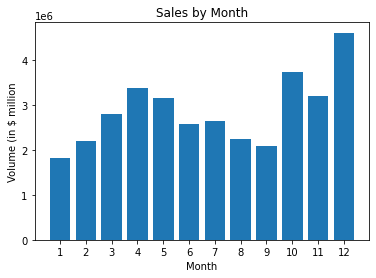

In [334]:
import matplotlib.pyplot as plt

x = range(1,13)

sales['Sales'] = pd.to_numeric(sales['Sales'])
y = sales['Sales']

plt.bar(x,y)

plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Volume (in $ million')
plt.xticks(x)

plt.show()

### QUESTION 2: WHICH CITY HAS THE LARGEST SALES VOLUME?

In [335]:
# Bringing back the original dataframe
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,8.97,09/17/19 20:56,9,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700.00,700.00,09/01/19 16:00,9,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700.00,700.00,09/23/19 07:39,9,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,379.99,09/19/19 17:30,9,"511 Forest St, San Francisco, CA 94016"


Extracting the City Names from Purchase Address

In [336]:
# Splitting the City Name out of 'Purchase Address' column
dummy = df['Purchase Address'].str.split(',')
City = dummy.str[1]
# Splitting the State Name out of 'Purchase Address' column
dummy2 = df['Purchase Address'].str.split(' ')
State = dummy2.str[-2]

value = City + ' ' + State

# Inserting the City Names into the Dataframe
City_State = df.insert(loc=8,column='City',value=value)
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001",Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215",Boston MA
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001",Los Angeles CA
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,8.97,09/17/19 20:56,9,"840 Highland St, Los Angeles, CA 90001",Los Angeles CA
186846,259354,iPhone,1,700.00,700.00,09/01/19 16:00,9,"216 Dogwood St, San Francisco, CA 94016",San Francisco CA
186847,259355,iPhone,1,700.00,700.00,09/23/19 07:39,9,"220 12th St, San Francisco, CA 94016",San Francisco CA
186848,259356,34in Ultrawide Monitor,1,379.99,379.99,09/19/19 17:30,9,"511 Forest St, San Francisco, CA 94016",San Francisco CA


Grouping the sales by Cities

In [337]:
df_city = df[['City', 'Sales']]
city = df.groupby('City').sum()
city

,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta GA,16602,2779908.20,2795498.58,104794
Austin TX,11153,1809873.61,1819581.75,69829
Boston MA,22528,3637409.77,3661642.01,141112
Dallas TX,16730,2752627.82,2767975.40,104620
Los Angeles CA,33289,5421435.23,5452570.80,208325
New York City NY,27932,4635370.83,4664317.43,175741
Portland ME,2750,447189.25,449758.27,17144
Portland OR,11303,1860558.22,1870732.34,70621
San Francisco CA,50239,8211461.74,8262203.91,315520


Query

In [338]:
a = city['Sales'].idxmax()
print("The City that generated the largest sales is {city}, with ${sales}".format(city=a, sales=city['Sales'].max()))


The City that generated the largest sales is  San Francisco CA, with $8262203.91


VISUALIZATION

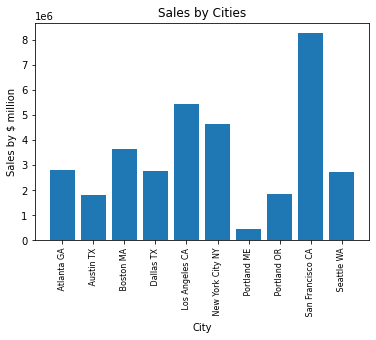

In [339]:
list_of_cities = city['Sales'].index

x = list_of_cities
y = city['Sales']

plt.bar(x,y)

plt.title('Sales by Cities')
plt.xlabel('City')
plt.ylabel('Sales by $ million')
plt.xticks(list_of_cities, rotation='vertical', size=8)

plt.show()

### QUESTION 3: WHICH TIME IN A DAY RECEIVES THE LARGEST ORDER QUANTITY?

In [340]:
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001",Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215",Boston MA
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001",Los Angeles CA
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,8.97,09/17/19 20:56,9,"840 Highland St, Los Angeles, CA 90001",Los Angeles CA
186846,259354,iPhone,1,700.00,700.00,09/01/19 16:00,9,"216 Dogwood St, San Francisco, CA 94016",San Francisco CA
186847,259355,iPhone,1,700.00,700.00,09/23/19 07:39,9,"220 12th St, San Francisco, CA 94016",San Francisco CA
186848,259356,34in Ultrawide Monitor,1,379.99,379.99,09/19/19 17:30,9,"511 Forest St, San Francisco, CA 94016",San Francisco CA


In [341]:
df['Time1'] = df['Order Date'].str.split(' ')
time = df['Time1'].str[1]
df.insert(loc=6,column='Time', value=time)
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Time,Month,Purchase Address,City,Time1
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,08:46,4,"917 1st St, Dallas, TX 75001",Dallas TX,"[04/19/19, 08:46]"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,22:30,4,"682 Chestnut St, Boston, MA 02215",Boston MA,"[04/07/19, 22:30]"
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,"[04/12/19, 14:38]"
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,"[04/12/19, 14:38]"
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,09:27,4,"333 8th St, Los Angeles, CA 90001",Los Angeles CA,"[04/30/19, 09:27]"
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,8.97,09/17/19 20:56,20:56,9,"840 Highland St, Los Angeles, CA 90001",Los Angeles CA,"[09/17/19, 20:56]"
186846,259354,iPhone,1,700.00,700.00,09/01/19 16:00,16:00,9,"216 Dogwood St, San Francisco, CA 94016",San Francisco CA,"[09/01/19, 16:00]"
186847,259355,iPhone,1,700.00,700.00,09/23/19 07:39,07:39,9,"220 12th St, San Francisco, CA 94016",San Francisco CA,"[09/23/19, 07:39]"
186848,259356,34in Ultrawide Monitor,1,379.99,379.99,09/19/19 17:30,17:30,9,"511 Forest St, San Francisco, CA 94016",San Francisco CA,"[09/19/19, 17:30]"


In [342]:
sum = df.groupby('Time').sum()
time = sum['Quantity Ordered'].idxmax()
print("The time that receives largest number of orders is {} o'clock".format(time))
print("The order quantity at that time is {} orders".format(sum['Quantity Ordered'].max()))

The time that receives largest number of orders is 11:58 o'clock
The order quantity at that time is 282 orders


C:\Users\DELL\AppData\Local\Temp\ipykernel_8892\1556092985.py:9: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


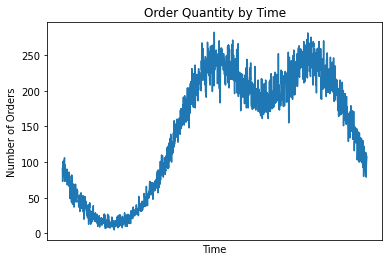

In [343]:
x = sum['Quantity Ordered'].index
y = sum['Quantity Ordered']

plt.plot(x,y)

plt.title('Order Quantity by Time')
plt.xlabel('Time')
plt.ylabel('Number of Orders')
plt.xticks([])

plt.show()
